# [IntoAI]  Linear Regression

### 설정

In [ ]:
# 파이썬 ≥3.5 필수
import sys
assert sys.version_info >= (3, 5)

# 사이킷런 ≥0.20 필수
import sklearn
assert sklearn.__version__ >= "0.20"

# 공통 모듈 임포트
import numpy as np
import os

# 노트북 실행 결과를 동일하게 유지하기 위해
np.random.seed(42)

# 깔끔한 그래프 출력을 위해
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

# 그림을 저장할 위치
PROJECT_ROOT_DIR = "."
CHAPTER_ID = "training_linear_models"
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID)
os.makedirs(IMAGES_PATH, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("그림 저장:", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

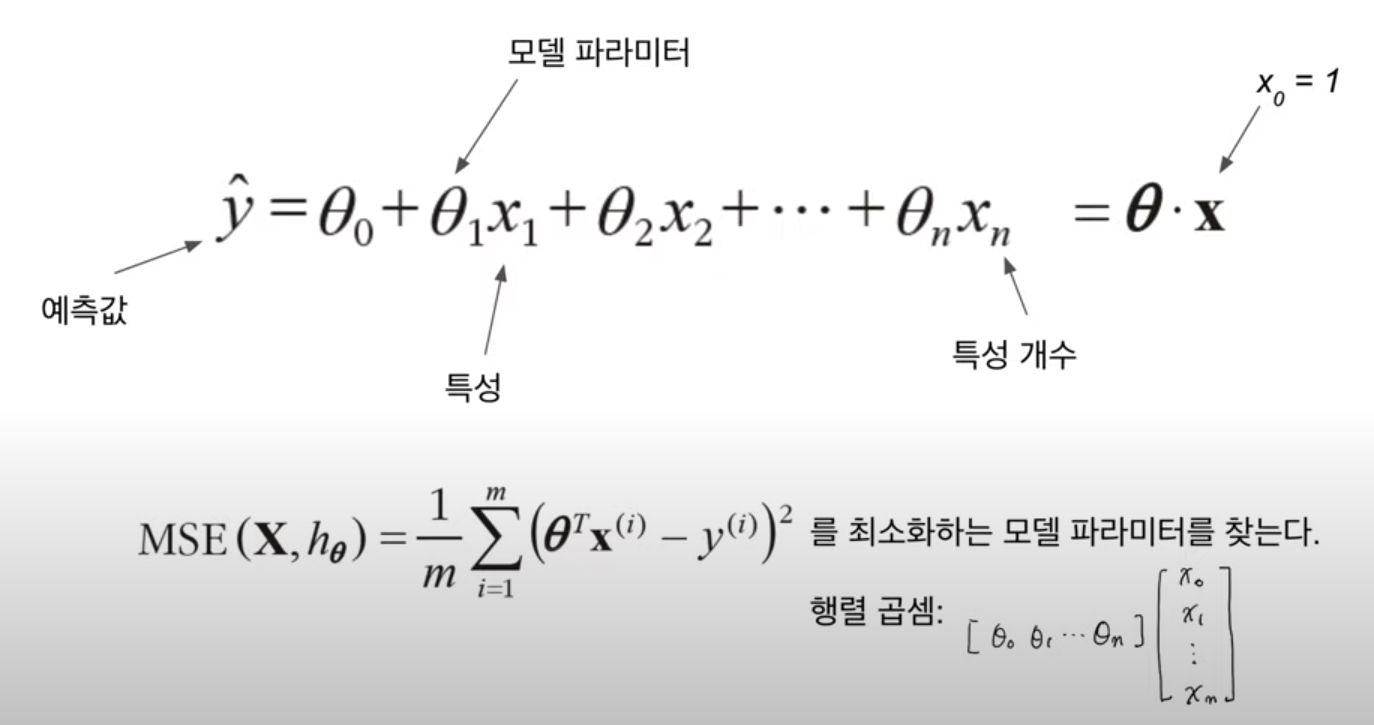

# 선형 회귀

In [ ]:
import numpy as np

#0~1 사이의 균등분포 난수, 100x1 행렬(샘플이 100개,특성은한개), 범위는 0~2
X = 2 * np.random.rand(100, 1)

#0~1 사이 표준(정규) 분포 난수(음수가 될 수도 있음)
y = 4 + 3 * X + np.random.randn(100, 1)

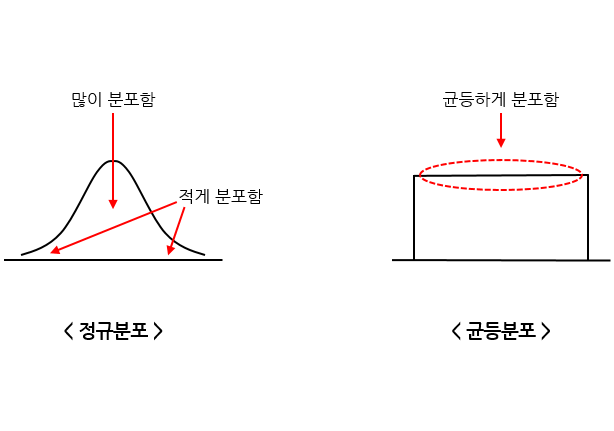

그림 저장: generated_data_plot


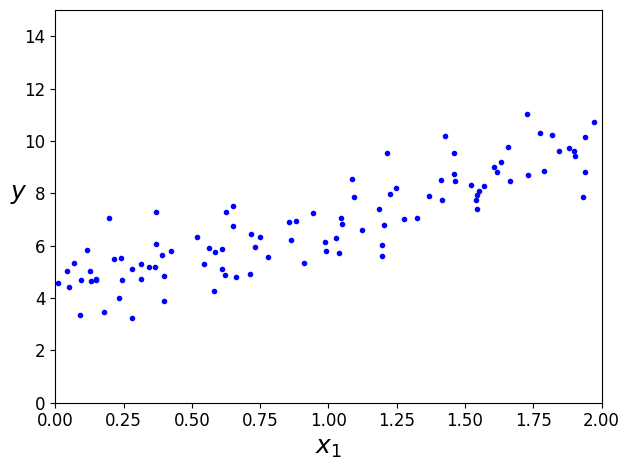

In [ ]:
plt.plot(X, y, "b.")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.axis([0, 2, 0, 15])
save_fig("generated_data_plot")
plt.show()

In [ ]:
print(X)

[[0.74908024]
 [1.90142861]
 [1.46398788]
 [1.19731697]
 [0.31203728]
 [0.31198904]
 [0.11616722]
 [1.73235229]
 [1.20223002]
 [1.41614516]
 [0.04116899]
 [1.9398197 ]
 [1.66488528]
 [0.42467822]
 [0.36364993]
 [0.36680902]
 [0.60848449]
 [1.04951286]
 [0.86389004]
 [0.58245828]
 [1.22370579]
 [0.27898772]
 [0.5842893 ]
 [0.73272369]
 [0.91213997]
 [1.57035192]
 [0.39934756]
 [1.02846888]
 [1.18482914]
 [0.09290083]
 [1.2150897 ]
 [0.34104825]
 [0.13010319]
 [1.89777107]
 [1.93126407]
 [1.6167947 ]
 [0.60922754]
 [0.19534423]
 [1.36846605]
 [0.88030499]
 [0.24407647]
 [0.99035382]
 [0.06877704]
 [1.8186408 ]
 [0.51755996]
 [1.32504457]
 [0.62342215]
 [1.04013604]
 [1.09342056]
 [0.36970891]
 [1.93916926]
 [1.55026565]
 [1.87899788]
 [1.7896547 ]
 [1.19579996]
 [1.84374847]
 [0.176985  ]
 [0.39196572]
 [0.09045458]
 [0.65066066]
 [0.77735458]
 [0.54269806]
 [1.65747502]
 [0.71350665]
 [0.56186902]
 [1.08539217]
 [0.28184845]
 [1.60439396]
 [0.14910129]
 [1.97377387]
 [1.54448954]
 [0.39

**식 4-4: 정규 방정식**

$\hat{\boldsymbol{\theta}} = (\mathbf{X}^T \mathbf{X})^{-1} \mathbf{X}^T \mathbf{y}$

In [ ]:
X_b = np.c_[np.ones((100, 1)), X]  # 모든 샘플에 1을 추가하기 위해 100개의 샘플에 1이 채워진 X에 열 방향으로 붙임(X0=1)
theta_best = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)

In [ ]:
print(X_b)

[[1.         0.74908024]
 [1.         1.90142861]
 [1.         1.46398788]
 [1.         1.19731697]
 [1.         0.31203728]
 [1.         0.31198904]
 [1.         0.11616722]
 [1.         1.73235229]
 [1.         1.20223002]
 [1.         1.41614516]
 [1.         0.04116899]
 [1.         1.9398197 ]
 [1.         1.66488528]
 [1.         0.42467822]
 [1.         0.36364993]
 [1.         0.36680902]
 [1.         0.60848449]
 [1.         1.04951286]
 [1.         0.86389004]
 [1.         0.58245828]
 [1.         1.22370579]
 [1.         0.27898772]
 [1.         0.5842893 ]
 [1.         0.73272369]
 [1.         0.91213997]
 [1.         1.57035192]
 [1.         0.39934756]
 [1.         1.02846888]
 [1.         1.18482914]
 [1.         0.09290083]
 [1.         1.2150897 ]
 [1.         0.34104825]
 [1.         0.13010319]
 [1.         1.89777107]
 [1.         1.93126407]
 [1.         1.6167947 ]
 [1.         0.60922754]
 [1.         0.19534423]
 [1.         1.36846605]
 [1.         0.88030499]


In [ ]:
theta_best

array([[4.21509616],
       [2.77011339]])

$\hat{y} = \mathbf{X} \boldsymbol{\hat{\theta}}$

In [ ]:
X_new = np.array([[0], [2]])
X_new_b = np.c_[np.ones((2, 1)), X_new]  # 모든 샘플에 x0 = 1을 추가합니다.
y_predict = X_new_b.dot(theta_best)
y_predict

array([[4.21509616],
       [9.75532293]])

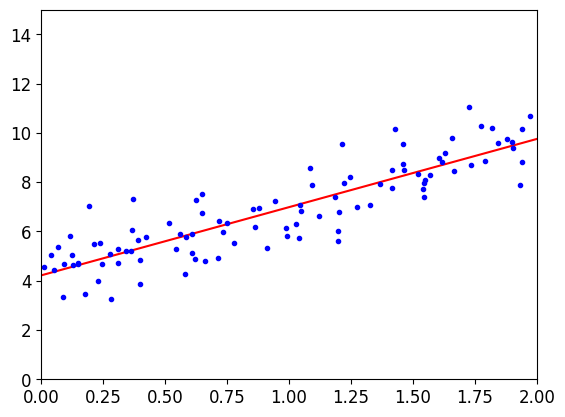

In [ ]:
plt.plot(X_new, y_predict, "r-")
plt.plot(X, y, "b.")
plt.axis([0, 2, 0, 15])
plt.show()

In [ ]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(X, y)

# 절편, 파라미터 출력
lin_reg.intercept_, lin_reg.coef_

(array([4.21509616]), array([[2.77011339]]))

In [ ]:
lin_reg.predict(X_new)

array([[4.21509616],
       [9.75532293]])

# 경사 하강법
## 배치 경사 하강법

**식 4-6: 비용 함수의 그레이디언트 벡터**

$
\dfrac{\partial}{\partial \boldsymbol{\theta}} \text{MSE}(\boldsymbol{\theta})
 = \dfrac{2}{m} \mathbf{X}^T (\mathbf{X} \boldsymbol{\theta} - \mathbf{y})
$

**식 4-7: 경사 하강법의 스텝**

$
\boldsymbol{\theta}^{(\text{next step})} = \boldsymbol{\theta} - \eta \dfrac{\partial}{\partial \boldsymbol{\theta}} \text{MSE}(\boldsymbol{\theta})
$


In [ ]:
# 전체 샘플을 이용하여 경사하강법을 수행
# 미분 값인 경사도를 보고 세타가 점점 줄어드는 방향으로 -eta를 곱해서 이동 => 최적의 세타 구하기

eta = 0.1  # 학습률(step)
n_iterations = 1000 # 얼마나 반복하여 학습할 것인가
m = 100 # 100개의 샘플

theta = np.random.randn(2,1)  # 랜덤 초기화 : 세타는 기울기와 절편 2개 이므로 2x1 정규 분포에서 난수 발생

print(theta)

for iteration in range(n_iterations):
    gradients = 2/m * X_b.T.dot(X_b.dot(theta) - y) # 위의 식과 동일
    theta = theta - eta * gradients # gradients에 eta를 곱하는 이유는 너무 급하게 내려가지 않고 조금씩 내려가기 위함

[[0.01300189]
 [1.45353408]]


In [ ]:
theta # 위에서 계산 한 것과 거의 유사하게 나오는 것을 볼 수 있음

array([[4.21509616],
       [2.77011339]])

In [ ]:
X_new_b.dot(theta) 

array([[4.21509616],
       [9.75532293]])

In [ ]:
theta_path_bgd = []

def plot_gradient_descent(theta, eta, theta_path=None):
    m = len(X_b)
    plt.plot(X, y, "b.")
    n_iterations = 1000
    for iteration in range(n_iterations):
        # 초기 10번 반복한 그래프(1000회는 너무 많음으로)
        if iteration < 10:
            y_predict = X_new_b.dot(theta)
            style = "b-" if iteration > 0 else "r--"
            plt.plot(X_new, y_predict, style)
        gradients = 2/m * X_b.T.dot(X_b.dot(theta) - y)
        theta = theta - eta * gradients
        if theta_path is not None:
            theta_path.append(theta)
    plt.xlabel("$x_1$", fontsize=18)
    plt.axis([0, 2, 0, 15])
    plt.title(r"$\eta = {}$".format(eta), fontsize=16)

그림 저장: gradient_descent_plot


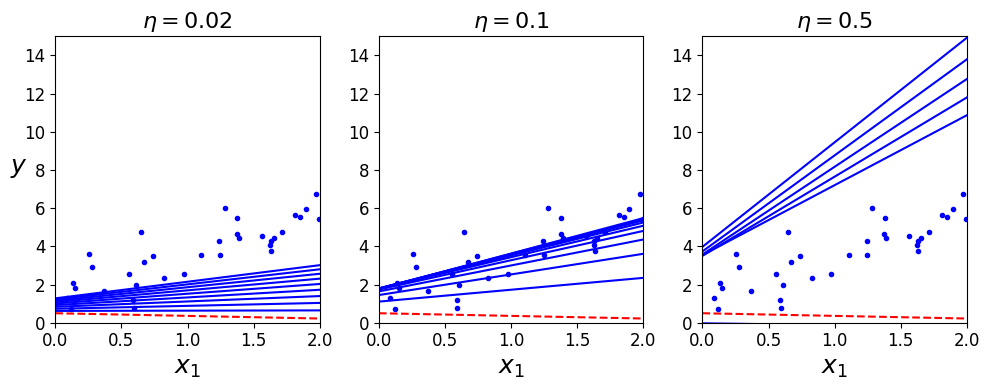

In [ ]:
np.random.seed(42)
theta = np.random.randn(2,1)  # random initialization

plt.figure(figsize=(10,4))
plt.subplot(131); plot_gradient_descent(theta, eta=0.02)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.subplot(132); plot_gradient_descent(theta, eta=0.1, theta_path=theta_path_bgd)
plt.subplot(133); plot_gradient_descent(theta, eta=0.5)

save_fig("gradient_descent_plot")
plt.show()

#에타가 너무 작으면 더 많이 학습을 해야하고 0.1이 적정하며 에타가 너무 크면 최적점을 쉽게 벗어난다

## 확률적 경사 하강법

In [ ]:
# 배치 경사 하강법은 X행렬을 모두 사용한 반면 일부데이터만 사용한다.
# 모델 파라미터를 랜덤 초기화 하는 건 동일
# 한 에포크에 대해서 훈련 세트를 섞고 훈련 세트에서 샘플을 하나 꺼낸 다음 경사하강법을 수행한다. 
# 다만 샘플이 하나. 그래디언트에다가 에타를 곱해가면서 모델 파라미터를 수정하고 이를 계속 반복하여 훈련세트를 모두 사용하면 다시 에포크를 시작한다.

theta_path_sgd = [] #세타 값이 어떻게 변해가는 지 확인하기 위해서 그림
m = len(X_b) #100개의 샘플이 들어가 있음(첫번째 차원의 길이를 반환한다.)
np.random.seed(42)

그림 저장: sgd_plot


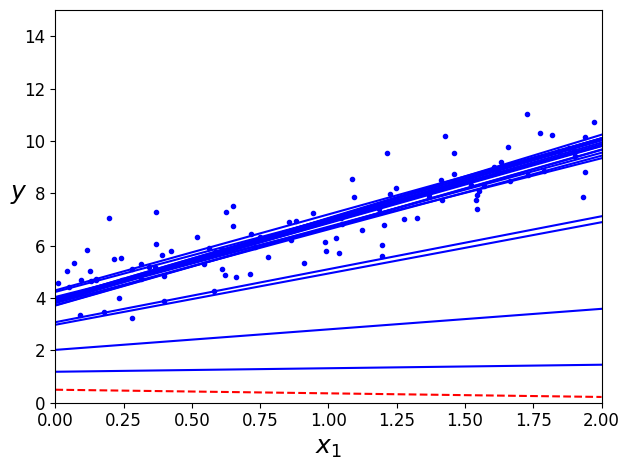

In [ ]:
n_epochs = 50
t0, t1 = 5, 50  # 학습 스케줄 하이퍼파라미터

def learning_schedule(t):
    return t0 / (t + t1)

theta = np.random.randn(2,1)  # 랜덤 초기화

# 한 에포크는 전체 샘플을 모두 사용하여야 하므로 m번 반복한다.
for epoch in range(n_epochs):
    for i in range(m):
        # 과정 그리기
        if epoch == 0 and i < 20:                    
            y_predict = X_new_b.dot(theta)           
            style = "b-" if i > 0 else "r--"         
            plt.plot(X_new, y_predict, style)  

        # 0~m까지의 숫자 중에 랜덤하게 index 하나 추출하고 index에 해당하는 x값과 y값을 뽑아서 경사하강법을 수행
        # 이 예제는 샘플의 중복을 허용하지만 사이킷 런의 경우 중복을 허용하지 않도록 구현되어있다.
        random_index = np.random.randint(m)
        xi = X_b[random_index:random_index+1]
        yi = y[random_index:random_index+1]
        gradients = 2 * xi.T.dot(xi.dot(theta) - yi)  # 2/m이 아닌 샘플 하나에 대해서 수행하므로 m이 빠져 있다.
        eta = learning_schedule(epoch * m + i)  # 학습할 수록 eta값을 줄여간다(최적 값에 조심스럽게 근사하기 위해서)
        theta = theta - eta * gradients
        theta_path_sgd.append(theta)                

plt.plot(X, y, "b.")                                
plt.xlabel("$x_1$", fontsize=18)                     
plt.ylabel("$y$", rotation=0, fontsize=18)           
plt.axis([0, 2, 0, 15])                              
save_fig("sgd_plot")                                
plt.show()                                           

In [ ]:
theta

array([[4.21076011],
       [2.74856079]])

In [ ]:
from sklearn.linear_model import SGDRegressor

# max_iter = epoch, tol=손실 함수가 별 진전이 없으면 최적이라고 생각하고 알고리즘을 멈춰라
sgd_reg = SGDRegressor(max_iter=1000, tol=1e-3, penalty=None, eta0=0.1, random_state=42)
# 사이킷 런의 y는 1차원 함수를 기대하지만 우리가 가진 y는 2차원 배열이기 때문에 ravel()을 사용한다.
sgd_reg.fit(X, y.ravel())

SGDRegressor(eta0=0.1, penalty=None, random_state=42)

In [ ]:
sgd_reg.intercept_, sgd_reg.coef_

(array([4.24365286]), array([2.8250878]))

## 미니배치 경사 하강법

In [ ]:
# 배치 경사하강법 + 확률적 경사 하강법
# (샘플 전체 몽땅 사용) + (샘플 한개 씩 사용) => 적당히 몇개씩 사용

theta_path_mgd = []

n_iterations = 50
minibatch_size = 20

np.random.seed(42)
theta = np.random.randn(2,1)  # 랜덤 초기화

t0, t1 = 200, 1000
def learning_schedule(t):
    return t0 / (t + t1)

t = 0
for epoch in range(n_iterations):
    # 중복을 허용하지 않는 샘플링
    shuffled_indices = np.random.permutation(m)
    X_b_shuffled = X_b[shuffled_indices]
    y_shuffled = y[shuffled_indices]
    for i in range(0, m, minibatch_size):
        t += 1
        # 미니 배치 개수씩 꺼내서 사용
        xi = X_b_shuffled[i:i+minibatch_size]
        yi = y_shuffled[i:i+minibatch_size]
        gradients = 2/minibatch_size * xi.T.dot(xi.dot(theta) - yi)
        eta = learning_schedule(t)
        theta = theta - eta * gradients
        theta_path_mgd.append(theta)

In [ ]:
theta

array([[4.25214635],
       [2.7896408 ]])

In [ ]:
theta_path_bgd = np.array(theta_path_bgd)
theta_path_sgd = np.array(theta_path_sgd)
theta_path_mgd = np.array(theta_path_mgd)

그림 저장: gradient_descent_paths_plot


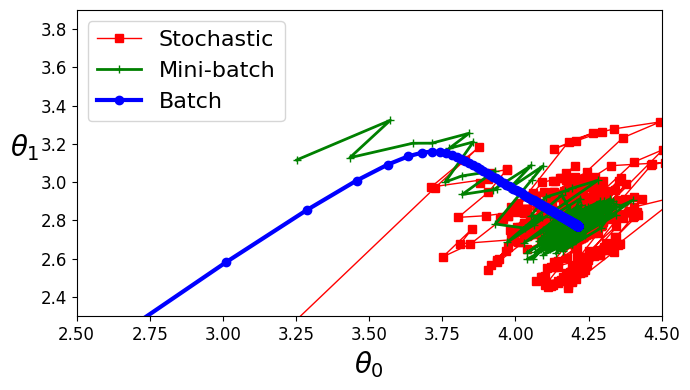

In [ ]:
plt.figure(figsize=(7,4))
plt.plot(theta_path_sgd[:, 0], theta_path_sgd[:, 1], "r-s", linewidth=1, label="Stochastic")
plt.plot(theta_path_mgd[:, 0], theta_path_mgd[:, 1], "g-+", linewidth=2, label="Mini-batch")
plt.plot(theta_path_bgd[:, 0], theta_path_bgd[:, 1], "b-o", linewidth=3, label="Batch")
plt.legend(loc="upper left", fontsize=16)
plt.xlabel(r"$\theta_0$", fontsize=20)
plt.ylabel(r"$\theta_1$   ", fontsize=20, rotation=0)
plt.axis([2.5, 4.5, 2.3, 3.9])
save_fig("gradient_descent_paths_plot")
plt.show()
#컴퓨터의 자원이 허락한다면 배치 경사하강법을 쓰는 게 좋지만 데이터 수가 많으면 불가능하기 때문에 미니 배치를 많이 사용한다.

# 다항 회귀

In [ ]:
# 여러개의 특성이 존재하는 경우

import numpy as np
import numpy.random as rnd

np.random.seed(42)

In [ ]:
#데이터 셋 만들기
# 100 개의 샘플
m = 100

# 0~6, -3~3, 100x1
X = 6 * np.random.rand(m, 1) - 3

#1/2 x^2 + x + 2
y = 0.5 * X**2 + X + 2 + np.random.randn(m, 1)

그림 저장: quadratic_data_plot


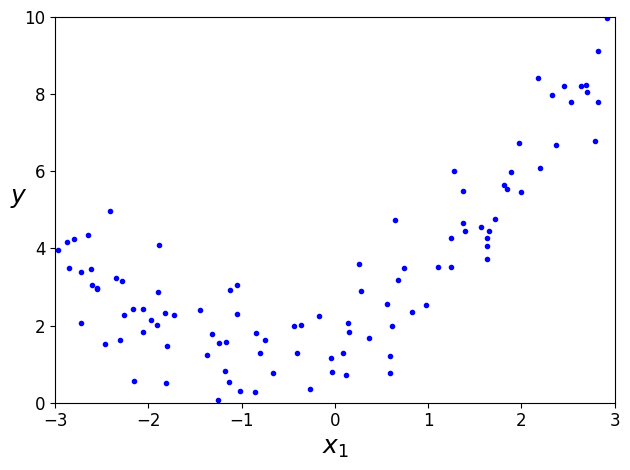

In [ ]:
plt.plot(X, y, "b.")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.axis([-3, 3, 0, 10])
save_fig("quadratic_data_plot")
plt.show()

In [ ]:
# 기존의 특성을 사용하여 가지고 있는 특성을 늘려주는 역할을 함
from sklearn.preprocessing import PolynomialFeatures

#degree=2, 차수가 가장 높은 특성이 2까지
# degree=3, a,b,c
# 1, a, b, c, a2, b2, c2, a3, b3, c3, ac, bc, ca, a2b, ...
poly_features = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly_features.fit_transform(X)

In [ ]:
# 랜덤하게 생성한 값과 제곱한 값

X_poly[0]

array([-0.75275929,  0.56664654])

In [ ]:
lin_reg = LinearRegression()
lin_reg.fit(X_poly, y)

# 절편, 계수 x^2의 계수는 0.5 였고 x의 계수는 1이었던 것과 비슷하게 나옴
lin_reg.intercept_, lin_reg.coef_

(array([1.78134581]), array([[0.93366893, 0.56456263]]))

그림 저장: quadratic_predictions_plot


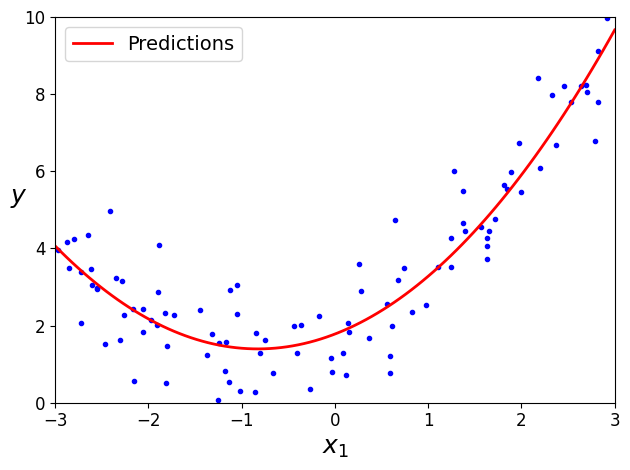

In [ ]:
X_new=np.linspace(-3, 3, 100).reshape(100, 1)
X_new_poly = poly_features.transform(X_new)
y_new = lin_reg.predict(X_new_poly)
plt.plot(X, y, "b.")
plt.plot(X_new, y_new, "r-", linewidth=2, label="Predictions")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.legend(loc="upper left", fontsize=14)
plt.axis([-3, 3, 0, 10])
save_fig("quadratic_predictions_plot")
plt.show()

그림 저장: high_degree_polynomials_plot


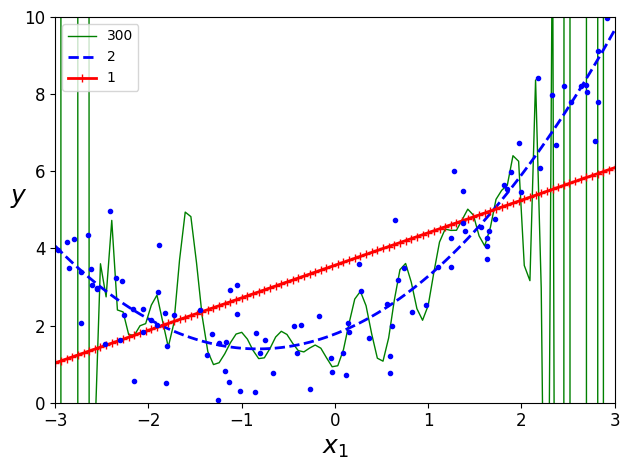

In [ ]:
# 특성의 개수에 따른 결과
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

for style, width, degree in (("g-", 1, 300), ("b--", 2, 2), ("r-+", 2, 1)):
    polybig_features = PolynomialFeatures(degree=degree, include_bias=False)
    std_scaler = StandardScaler()
    lin_reg = LinearRegression()
    polynomial_regression = Pipeline([
            ("poly_features", polybig_features),
            ("std_scaler", std_scaler),
            ("lin_reg", lin_reg),
        ])
    polynomial_regression.fit(X, y)
    y_newbig = polynomial_regression.predict(X_new)
    plt.plot(X_new, y_newbig, style, label=str(degree), linewidth=width)

plt.plot(X, y, "b.", linewidth=3)
plt.legend(loc="upper left")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.axis([-3, 3, 0, 10])
save_fig("high_degree_polynomials_plot")
plt.show()

# 학습 곡선

In [ ]:
# 과대적합과 과소적합 판단하기

from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

# 훈련 세트와 검증 세트를 8:2로 나누어 MSE를 구한다.
def plot_learning_curves(model, X, y):
    X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=10)
    train_errors, val_errors = [], []
    for m in range(1, len(X_train) + 1):
        model.fit(X_train[:m], y_train[:m])
        y_train_predict = model.predict(X_train[:m])
        y_val_predict = model.predict(X_val)
        train_errors.append(mean_squared_error(y_train[:m], y_train_predict))
        val_errors.append(mean_squared_error(y_val, y_val_predict))

    plt.plot(np.sqrt(train_errors), "r-+", linewidth=2, label="train")
    plt.plot(np.sqrt(val_errors), "b-", linewidth=3, label="val")
    plt.legend(loc="upper right", fontsize=14)   
    plt.xlabel("Training set size", fontsize=14) 
    plt.ylabel("RMSE", fontsize=14)              

그림 저장: underfitting_learning_curves_plot


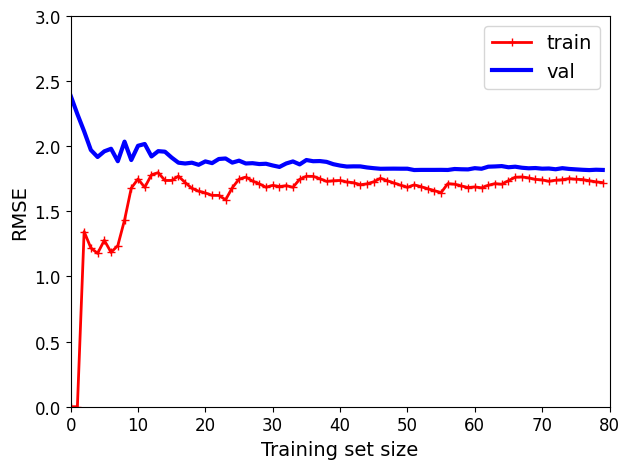

In [ ]:
lin_reg = LinearRegression()
plot_learning_curves(lin_reg, X, y)
plt.axis([0, 80, 0, 3])                         
save_fig("underfitting_learning_curves_plot")   
plt.show()                                      
# 훈련 세트와 검증세트가 너무 빨리 가까워지면 과소적합을 의심할 수 있다.

그림 저장: learning_curves_plot


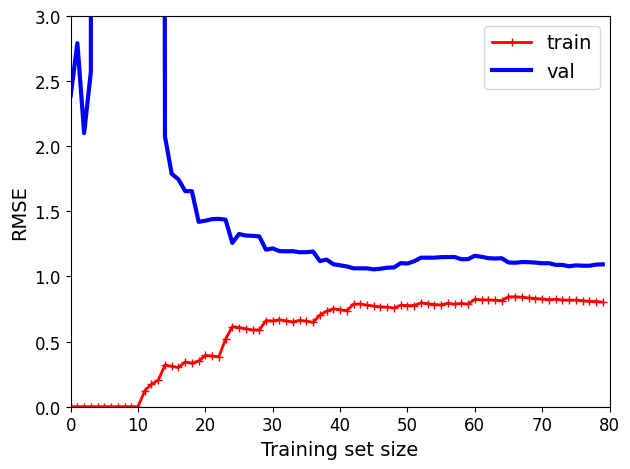

In [ ]:
# 과소적합을 해결
# 고차항까지 만들어서 해결한다. => 에러가 더 낮아짐 => 더 바람직한 그래프임

from sklearn.pipeline import Pipeline

polynomial_regression = Pipeline([
        ("poly_features", PolynomialFeatures(degree=10, include_bias=False)),
        ("lin_reg", LinearRegression()),
    ])

plot_learning_curves(polynomial_regression, X, y)
plt.axis([0, 80, 0, 3])           # 책에는 없음
save_fig("learning_curves_plot")  # 책에는 없음
plt.show()                        # 책에는 없음